# Application of Confidence Region Drawing Procedure to Santa Ana Wildfire Data

While I'm ironing out the method and getting coverage guarantees on toy problems, I'm just going to apply the method as it exists now (11/4/2022) on the Santa Ana winds data from Cooley's paper. This serves as a demonstration of what the end result of this project might look like.

In [1]:
# load data
load(url("https://www.stat.colostate.edu/~cooleyd/Isolines/santaAnaBivariate.RData"))

In [3]:
source('/global/u1/j/jbbutler/isolines_uq/scripts/R/confidence_regions_procedure/confidenceRegions.R')

Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: mgcv

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.8-42. For overview type 'help("mgcv-package")'.


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘data.table’


The following object is masked from ‘package:purrr’:

    transpose


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [5]:
library(ggplot2)
library(dplyr)

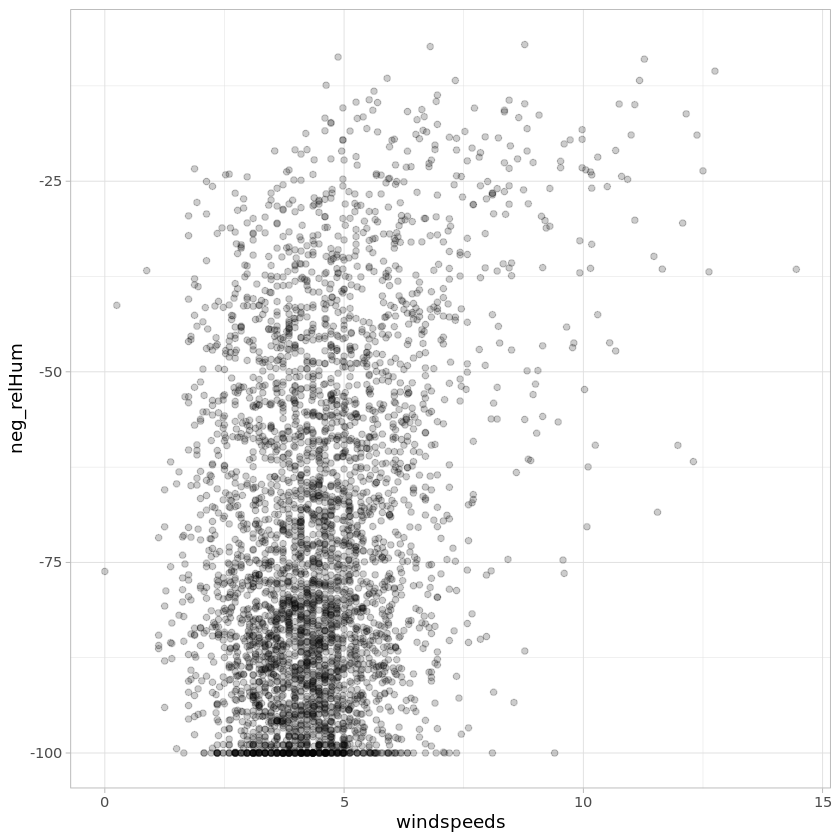

In [6]:
ggplot(saDat) + geom_point(aes(x = windspeeds, y = neg_relHum), alpha = 0.2) + theme_light()

In [10]:
B <- 500
alphas <- c(0.05)
ps <- c(0.01)
asympIndep <- FALSE
bds_x1 <- c(0, 20)
bds_x2 <- c(-100, 0)
gticks <- 500
grid <- expand.grid(X1 = seq(bds_x1[1], bds_x1[2], length.out = gticks),
                    X2 = seq(bds_x2[1], bds_x2[2], length.out = gticks))
beta_funcs_dict <- list()
beta_funcs_dict[['1/2']] <- function(n) {return(n^(-1/2))}
dat <- data.frame(X1 = saDat$windspeeds, X2 = saDat$neg_relHum)

In [13]:
sa_base_out <- drawBaseRegions(dat=dat, grid=grid, alphas=alphas, ps=ps, B=B, 
                              beta_funcs_dict=beta_funcs_dict)


In [16]:
names(sa_base_out[[1]])

[1] "Cl"            "Cu"            "alpha"         "data"         
 [5] "p"             "B"             "Zs"            "grid"         
 [9] "bhat"          "beta_func"     "beta_function"

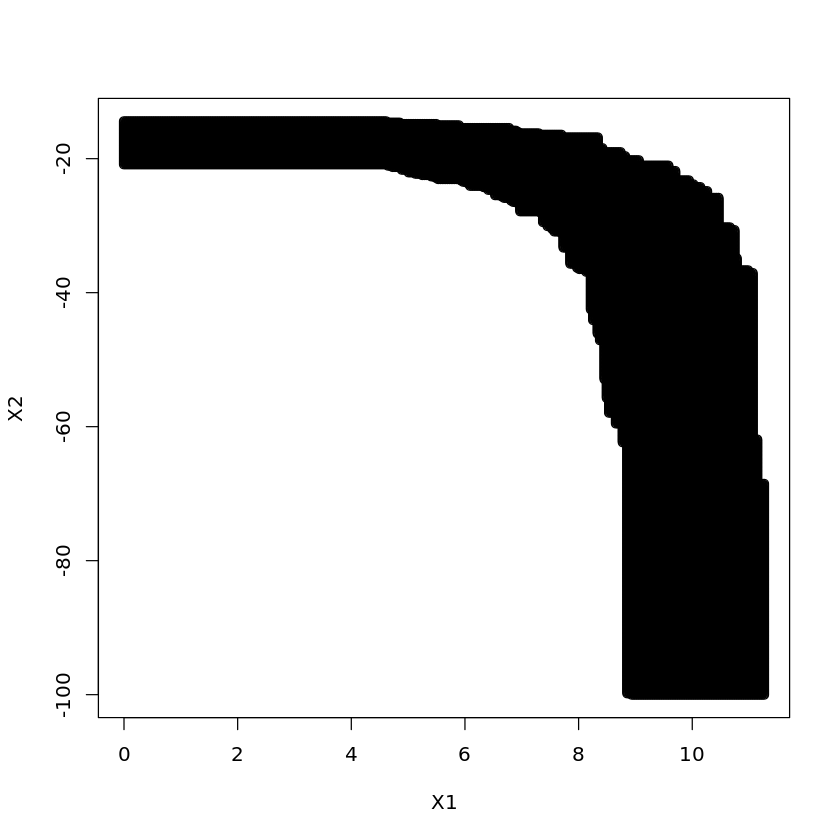

In [18]:
plot(setdiff(sa_base_out[[1]]$Cu, sa_base_out[[1]]$Cl))

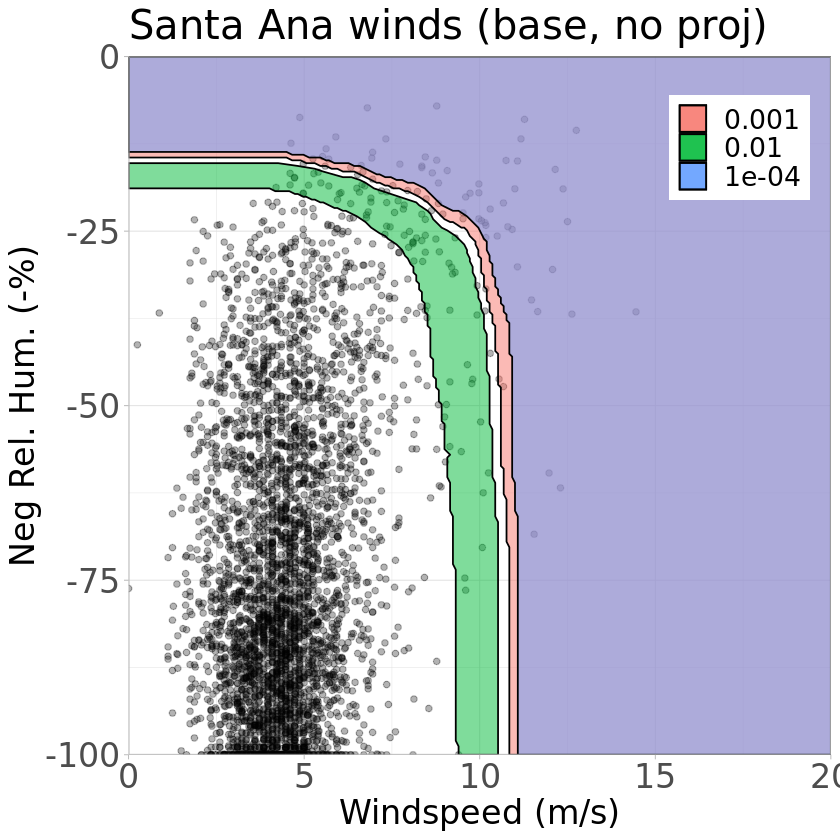

In [41]:
ggplot() + geom_point(data = dat, aes(x = X1, y = X2), alpha = 0.3) + 
geom_polygon(data = data.frame(sa_base_out1$conf_region_poly[[1]]), aes(x = X1, y = X2, fill = as.character(sa_base_out1$p)), color = 'black', alpha = 0.5) + 
geom_polygon(data = data.frame(sa_base_out3$conf_region_poly[[1]]), aes(x = X1, y = X2, fill = as.character(sa_base_out3$p)), color = 'black', alpha = 0.5) +
geom_polygon(data = data.frame(sa_base_out5$conf_region_poly[[1]]), aes(x = X1, y = X2, fill = as.character(sa_base_out5$p)), color = 'black', alpha = 0.5) +
#scale_fill_manual(values = c(as.character(sa_base_out1$p) = 'cyan', as.character(sa_base_out2$p) = 'orange')) +
xlab('Windspeed (m/s)') + ylab('Neg Rel. Hum. (-%)') +
ggtitle(paste('Santa Ana winds (base, no proj)')) +
coord_cartesian(ylim=bds_x2, xlim = bds_x1, expand = FALSE) +
theme_light() +
theme(legend.position = c(0.87, 0.87), 
      legend.title = element_blank(), 
#     legend.box.background = element_rect(colour = "black"), 
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20))

In [80]:
sa_proj_out1 <- projectBaseRegion(base_out=sa_base_out1, proj_p=0.001, bds_x1=bds_x1, bds_x2=bds_x2, asympIndep=FALSE)
sa_proj_out2 <- projectBaseRegion(base_out=sa_base_out1, proj_p=0.0001, bds_x1=bds_x1, bds_x2=bds_x2, asympIndep=FALSE)

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


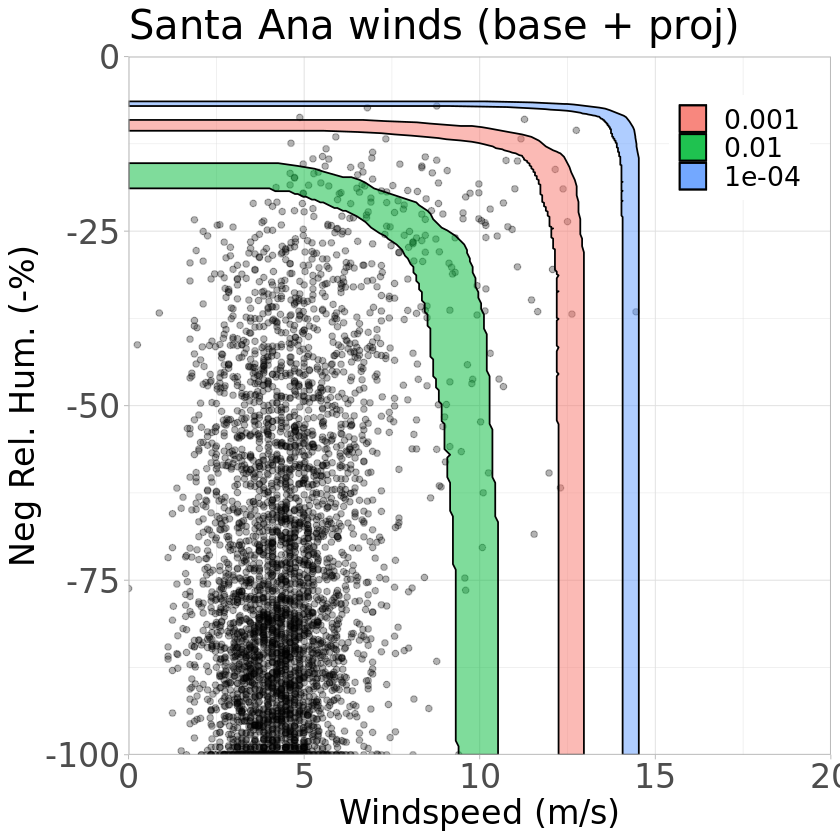

In [83]:
ggplot() + geom_point(data = dat, aes(x = X1, y = X2), alpha = 0.3) + 
geom_polygon(data = data.frame(sa_base_out1$conf_region_poly[[1]]), aes(x = X1, y = X2, fill = as.character(sa_base_out1$p)), color = 'black', alpha = 0.5) + 
geom_polygon(data = data.frame(as.matrix(sa_proj_out1$proj_region_poly[[3]])), aes(x = X1, y = X2, fill = as.character(sa_proj_out1$proj_p)), color = 'black', alpha = 0.5) +
geom_polygon(data = data.frame(as.matrix(sa_proj_out2$proj_region_poly[[3]])), aes(x = X1, y = X2, fill = as.character(sa_proj_out2$proj_p)), color = 'black', alpha = 0.5) +
#scale_fill_manual(values = c(as.character(sa_base_out1$p) = 'cyan', as.character(sa_base_out2$p) = 'orange')) +
xlab('Windspeed (m/s)') + ylab('Neg Rel. Hum. (-%)') +
ggtitle(paste('Santa Ana winds (base + proj)')) +
coord_cartesian(ylim=bds_x2, xlim = bds_x1, expand = FALSE) +
theme_light() +
theme(legend.position = c(0.87, 0.87), 
      legend.title = element_blank(), 
#     legend.box.background = element_rect(colour = "black"), 
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20))

remaining questions (11/8):

1. What is this warning message?
2. Why did the projected regions get... smaller?